**Descripción**

## **Instrucciones para examen**

**Objetivo:** 

Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de clasificación en un dataset real. Utilizaremos el «Wine Quality Dataset» disponible en UCI Machine Learning Repository. Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo, así como una comprensión de las consideraciones éticas y tecnológicas en el análisis de datos.

**Contexto y Descripción del Dataset**

El «Wine Quality Dataset» contiene datos sobre las características químicas y físicas de diferentes muestras de vino tinto y blanco, así como su calidad, evaluada por expertos en una escala de 0 a 10. Este dataset es ampliamente utilizado en la investigación de modelos de clasificación y regresión debido a su naturaleza multifacética y su aplicación en la industria vinícola.

**Diccionario de Datos:**

fixed acidity: Acidez fija en g/dm³.

volatile acidity: Acidez volátil en g/dm³.

citric acid: Ácido cítrico en g/dm³.

residual sugar: Azúcar residual en g/dm³.

chlorides: Cloruros en g/dm³.

free sulfur dioxide: Dióxido de azufre libre en mg/dm³.

total sulfur dioxide: Dióxido de azufre total en mg/dm³.

density: Densidad en g/cm³.

pH: Nivel de pH.

sulphates: Sulfatos en g/dm³.

alcohol: Porcentaje de alcohol en % vol.

quality: Calidad del vino (variable objetivo, escala de 0 a 10).

### **Cargamos los datos y realizamos exploracion inicial**

In [38]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,roc_curve, auc, classification_report)
import matplotlib.pyplot as plt
import sklearn.ensemble as RandomForestClassifier

In [2]:
# Cargar el dataset de vino tinto
red_wine = pd.read_csv('..\data\winequality-red.csv', sep=';')

# Cargar el dataset de vino blanco
white_wine = pd.read_csv('..\data\winequality-white.csv', sep=';')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\damav\AppData\Local\Temp\ipykernel_59012\1867352624.py:2: SyntaxWarning: invalid escape sequence '\d'
  red_wine = pd.read_csv('..\data\winequality-red.csv', sep=';')
C:\Users\damav\AppData\Local\Temp\ipykernel_59012\1867352624.py:5: SyntaxWarning: invalid escape sequence '\d'
  white_wine = pd.read_csv('..\data\winequality-white.csv', sep=';')


In [3]:
# Vino tinto
print(red_wine.head())
print(red_wine.info())

# Vino blanco
print(white_wine.head())
print(white_wine.info())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
# Añadir columna 'type' para identificar el tipo de vino
red_wine['type'] = 'red'
white_wine['type'] = 'white'

# Combinar los datasets
wine_data = pd.concat([red_wine, white_wine], ignore_index=True)

# Contar el número de muestras por tipo de vino
print(wine_data['type'].value_counts())

type
white    4898
red      1599
Name: count, dtype: int64


## **Limpieza de Datos:**


#### **Identificación y eliminación de valores duplicados:**

Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.


In [5]:
# Verificar si hay duplicados en el dataset de vino tinto
print("Duplicados en vino tinto:", red_wine.duplicated().sum())

# Verificar si hay duplicados en el dataset de vino blanco
print("Duplicados en vino blanco:", white_wine.duplicated().sum())

# Si estás trabajando con el dataset combinado
print("Duplicados en dataset combinado:", wine_data.duplicated().sum())

# Eliminar duplicados 
wine_data = wine_data.drop_duplicates()

Duplicados en vino tinto: 240
Duplicados en vino blanco: 937
Duplicados en dataset combinado: 1177


#### **Verificación y ajuste de tipos de datos:**

 Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.

In [6]:
# Revisar los tipos de datos
print(wine_data.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object


In [7]:
# Convertir la columna 'type' a categorical
wine_data['type'] = wine_data['type'].astype('category')

#### **Corrección de inconsistencias en valores categóricos:**

Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.


In [8]:
# Verificar los valores únicos en la columna 'type'
print(wine_data['type'].unique())

# Unificar el formato de los valores en 'type' a minúsculas
wine_data['type'] = wine_data['type'].str.lower()

# Verificar nuevamente los valores únicos
print(wine_data['type'].unique())

['red', 'white']
Categories (2, object): ['red', 'white']
['red' 'white']


#### **Manejo de valores faltantes adecuadamente:**

Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

In [9]:
# Verificamos los valores faltantes
qsna=wine_data.shape[0]-wine_data.isnull().sum(axis=0)
qna=wine_data.isnull().sum(axis=0)
ppna=round(100*(wine_data.isnull().sum(axis=0)/wine_data.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

# No hay valores faltantes

,datos sin NAs en q,Na en q,Na en %
fixed acidity,5320,0,0.0
volatile acidity,5320,0,0.0
citric acid,5320,0,0.0
residual sugar,5320,0,0.0
chlorides,5320,0,0.0
free sulfur dioxide,5320,0,0.0
total sulfur dioxide,5320,0,0.0
density,5320,0,0.0
pH,5320,0,0.0
sulphates,5320,0,0.0


In [10]:
# Identificar columnas numéricas y categóricas
numeric_columns = wine_data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = wine_data.select_dtypes(include='object').columns

#### **Verificacion de valores outliers**

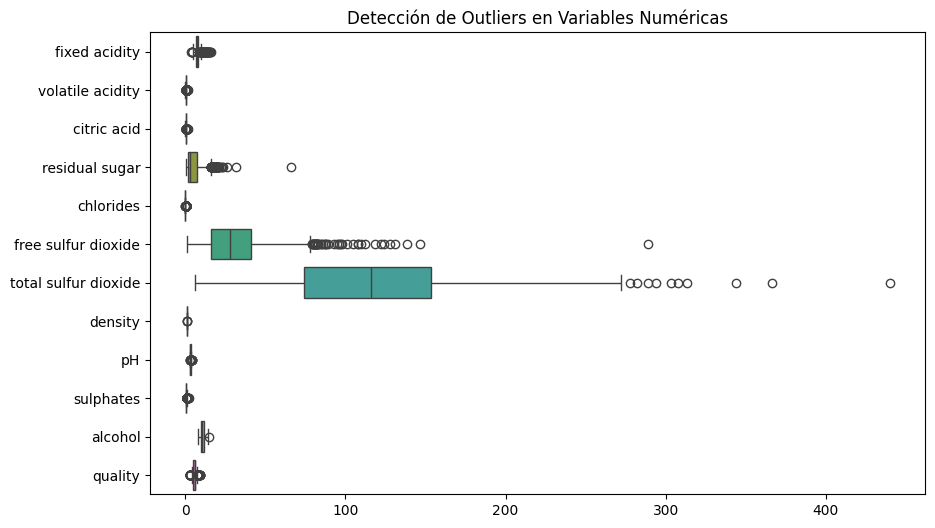

In [11]:
# Boxplot para identificar outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=wine_data[numeric_columns], orient="h")
plt.title("Detección de Outliers en Variables Numéricas")
plt.show()

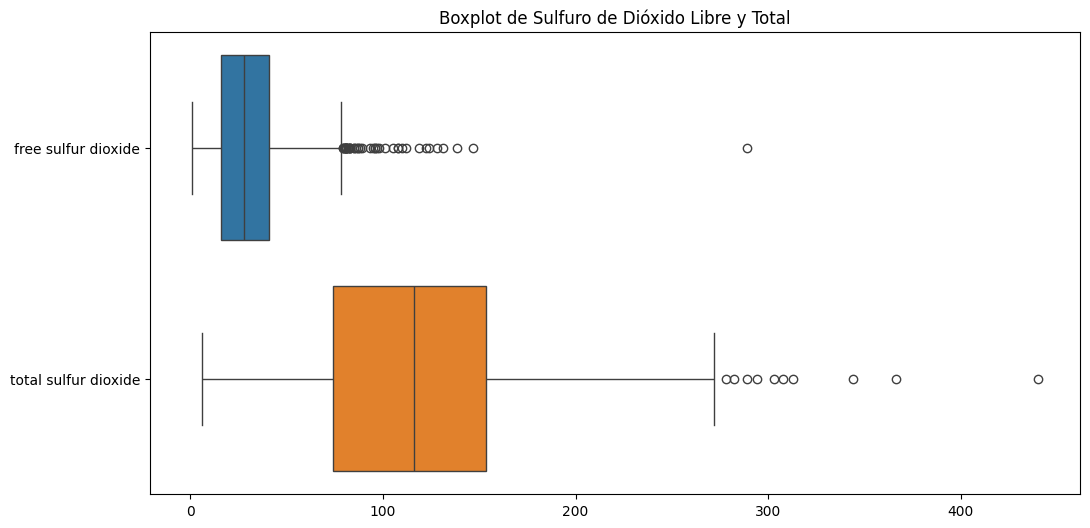

In [12]:
# Boxplot de Sulfuro de Dióxido Libre y Total
plt.figure(figsize=(12,6))
sns.boxplot(data=wine_data[['free sulfur dioxide', 'total sulfur dioxide']], orient='h')
plt.title('Boxplot de Sulfuro de Dióxido Libre y Total')
plt.show()

In [13]:
# Estadísticas descriptivas
print("Estadísticas de 'free sulfur dioxide':\n", wine_data['free sulfur dioxide'].describe())
print("\nEstadísticas de 'total sulfur dioxide':\n", wine_data['total sulfur dioxide'].describe())

Estadísticas de 'free sulfur dioxide':
 count    5320.000000
mean       30.036654
std        17.805045
min         1.000000
25%        16.000000
50%        28.000000
75%        41.000000
max       289.000000
Name: free sulfur dioxide, dtype: float64

Estadísticas de 'total sulfur dioxide':
 count    5320.000000
mean      114.109023
std        56.774223
min         6.000000
25%        74.000000
50%       116.000000
75%       153.250000
max       440.000000
Name: total sulfur dioxide, dtype: float64


In [14]:
# Cálculo de IQR para 'free sulfur dioxide'
Q1_free = wine_data['free sulfur dioxide'].quantile(0.25)
Q3_free = wine_data['free sulfur dioxide'].quantile(0.75)
IQR_free = Q3_free - Q1_free

lower_bound_free = Q1_free - 1.5 * IQR_free
upper_bound_free = Q3_free + 1.5 * IQR_free

print(f"Límites para 'free sulfur dioxide': {lower_bound_free} - {upper_bound_free}")

# Cálculo de IQR para 'total sulfur dioxide'
Q1_total = wine_data['total sulfur dioxide'].quantile(0.25)
Q3_total = wine_data['total sulfur dioxide'].quantile(0.75)
IQR_total = Q3_total - Q1_total

lower_bound_total = Q1_total - 1.5 * IQR_total
upper_bound_total = Q3_total + 1.5 * IQR_total

print(f"Límites para 'total sulfur dioxide': {lower_bound_total} - {upper_bound_total}")

Límites para 'free sulfur dioxide': -21.5 - 78.5
Límites para 'total sulfur dioxide': -44.875 - 272.125


In [15]:
# Identificar outliers en 'free sulfur dioxide'
outliers_free = wine_data[(wine_data['free sulfur dioxide'] < lower_bound_free) | (wine_data['free sulfur dioxide'] > upper_bound_free)]

# Identificar outliers en 'total sulfur dioxide'
outliers_total = wine_data[(wine_data['total sulfur dioxide'] < lower_bound_total) | (wine_data['total sulfur dioxide'] > upper_bound_total)]

print(f"Número de outliers en 'free sulfur dioxide': {outliers_free.shape[0]}")
print(f"Número de outliers en 'total sulfur dioxide': {outliers_total.shape[0]}")

Número de outliers en 'free sulfur dioxide': 44
Número de outliers en 'total sulfur dioxide': 10


In [16]:
total_records = wine_data.shape[0]
percentage_outliers_free = (outliers_free.shape[0] / total_records) * 100
percentage_outliers_total = (outliers_total.shape[0] / total_records) * 100

print(f"Porcentaje de outliers en 'free sulfur dioxide': {percentage_outliers_free:.2f}%")
print(f"Porcentaje de outliers en 'total sulfur dioxide': {percentage_outliers_total:.2f}%")


# El porcentaje de outliner es pequño, para poder terminandar si los ouliers estan realimente fuera de rango necesitamos mas conomiento sobre los rangos de estas metricas. 

Porcentaje de outliers en 'free sulfur dioxide': 0.83%
Porcentaje de outliers en 'total sulfur dioxide': 0.19%


### **Exploración de Datos:**


#### **Visualizaciones univariadas y multivariadas:** 

Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.


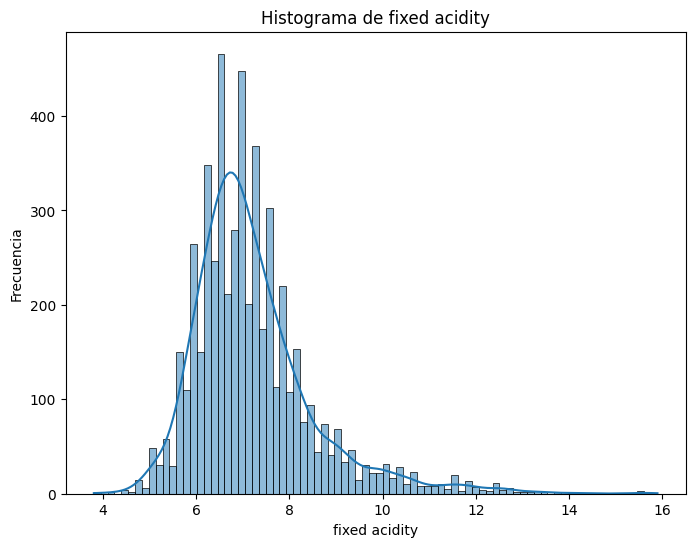

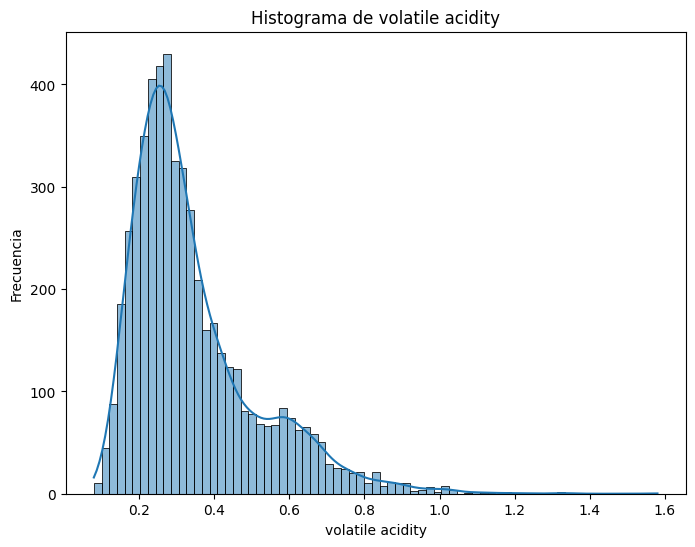

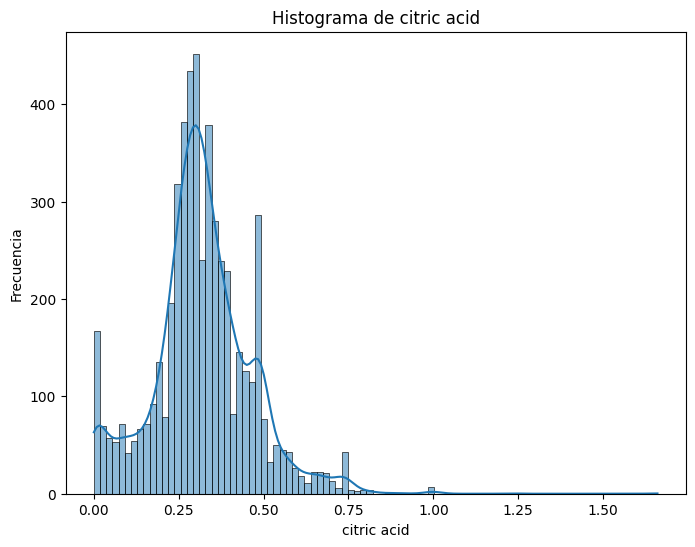

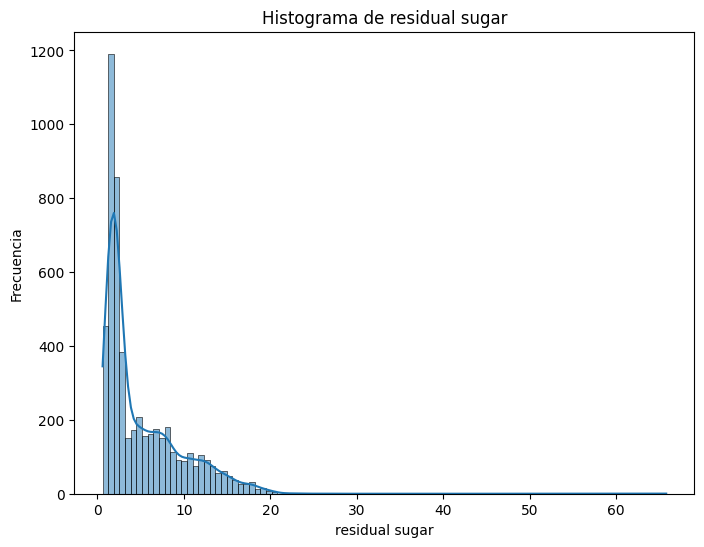

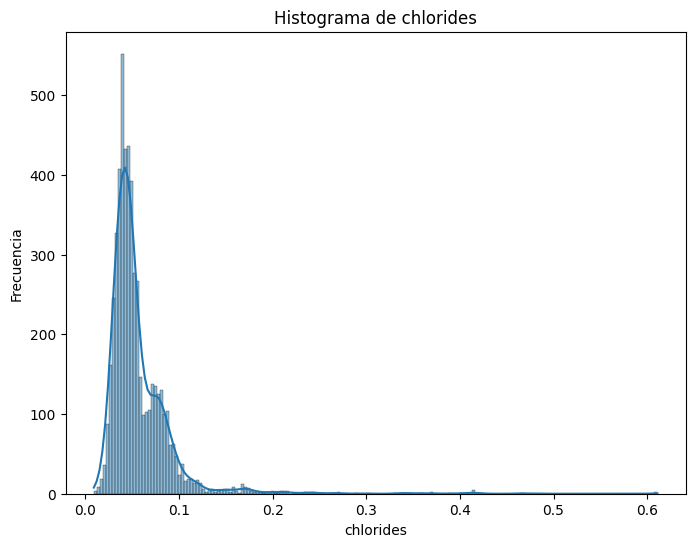

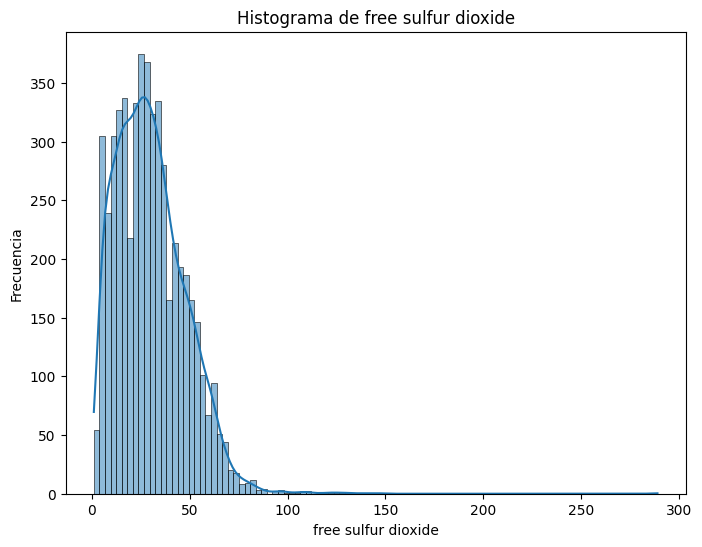

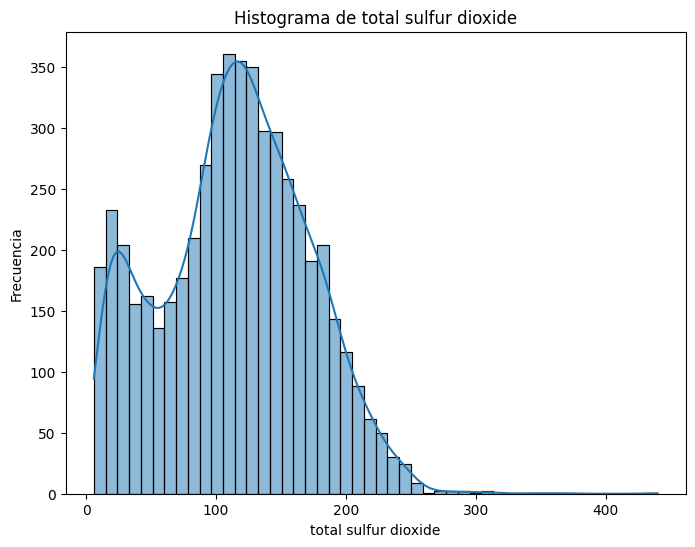

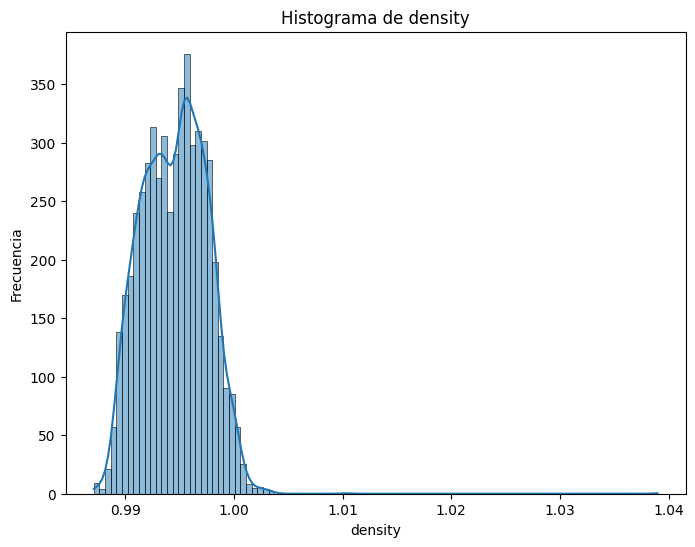

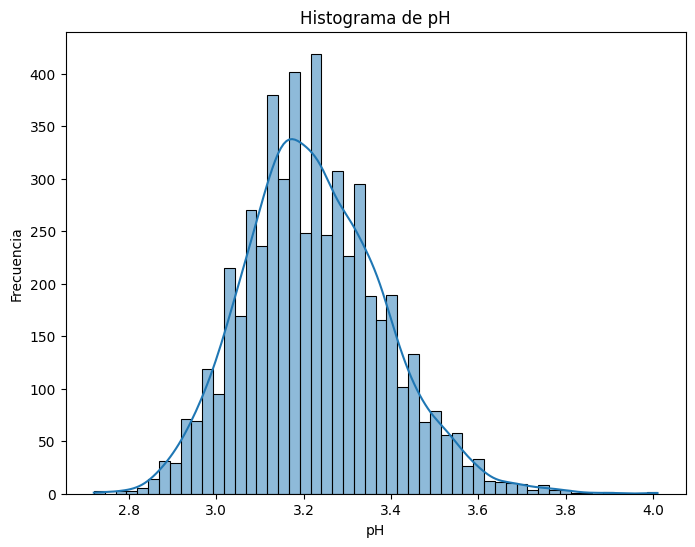

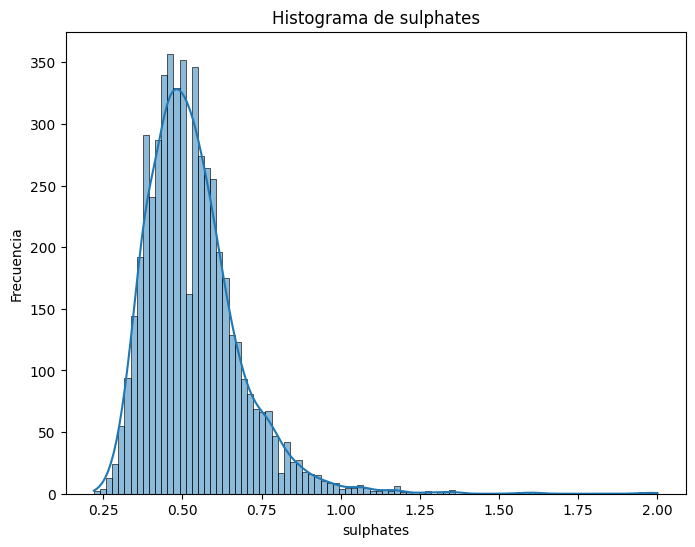

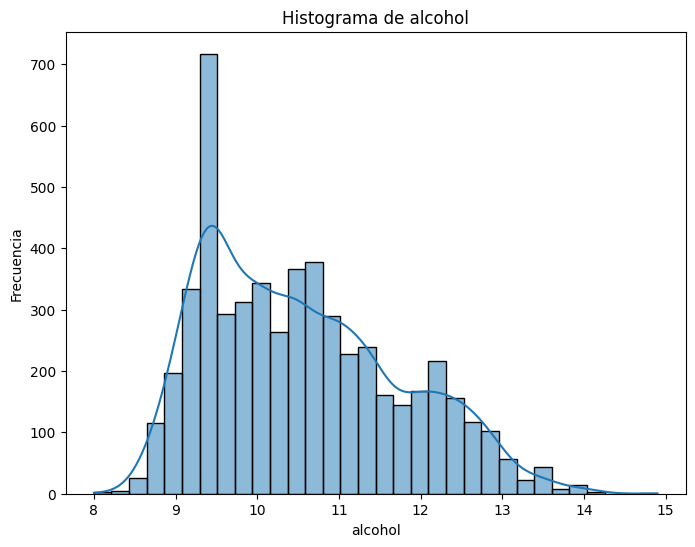

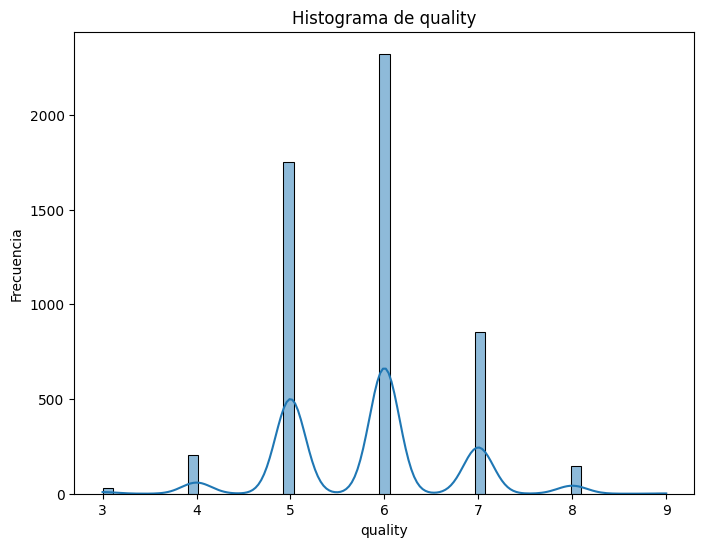

In [17]:
# Selecciona columnas numéricas
numeric_cols = wine_data.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(wine_data[col], kde=True)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

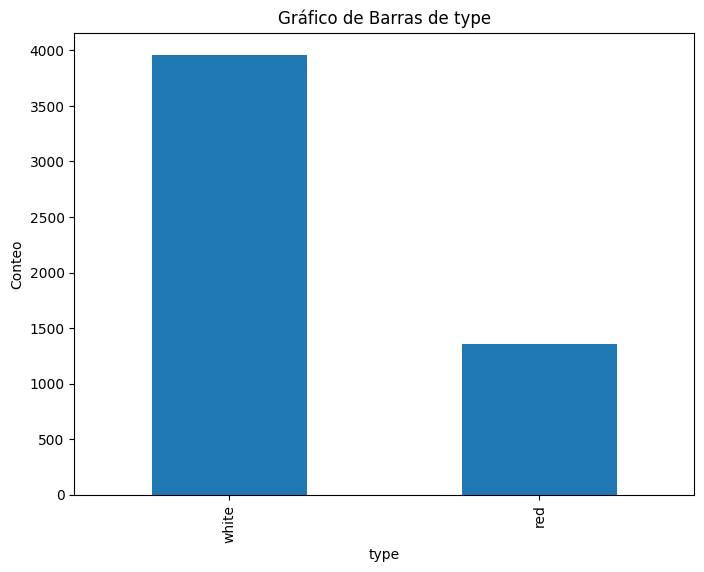

In [18]:
# Selecciona columnas categóricas
categorical_cols = wine_data.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    wine_data[col].value_counts().plot(kind='bar')
    plt.title(f'Gráfico de Barras de {col}')
    plt.xlabel(col)
    plt.ylabel('Conteo')
    plt.show()

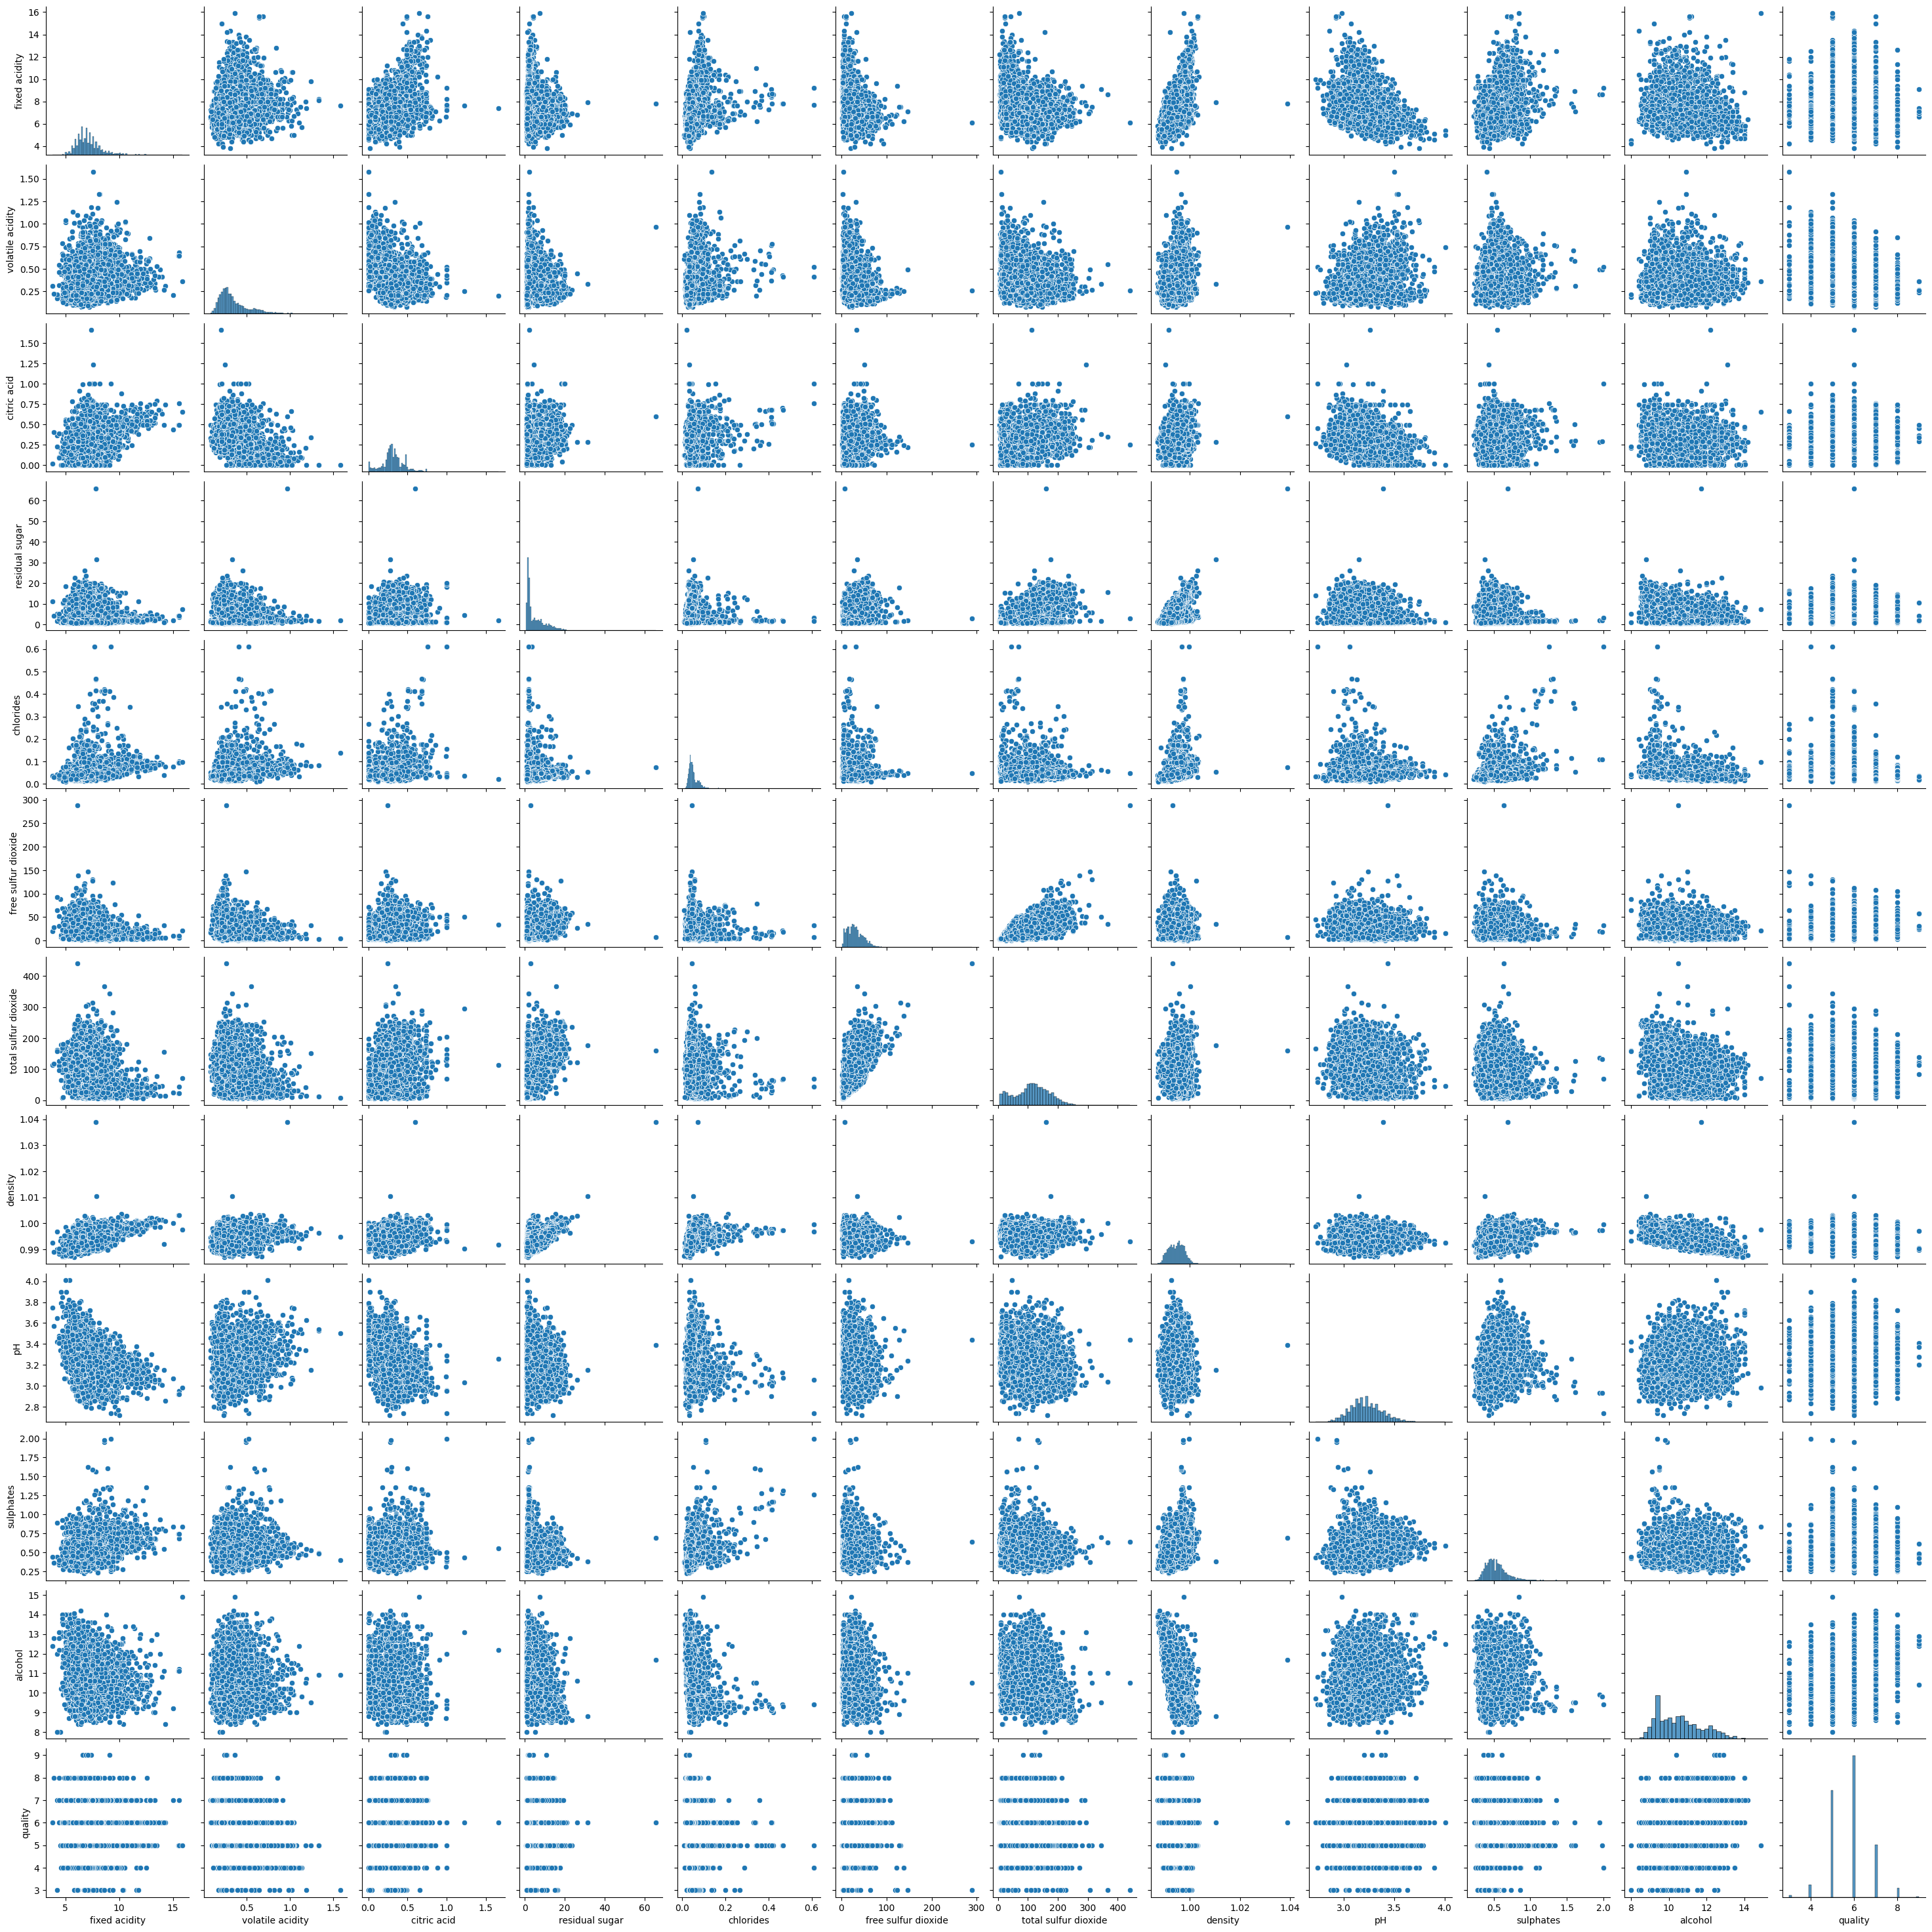

In [19]:
# Matriz de diagramas de dispersión
sns.pairplot(wine_data[numeric_cols])
plt.show()

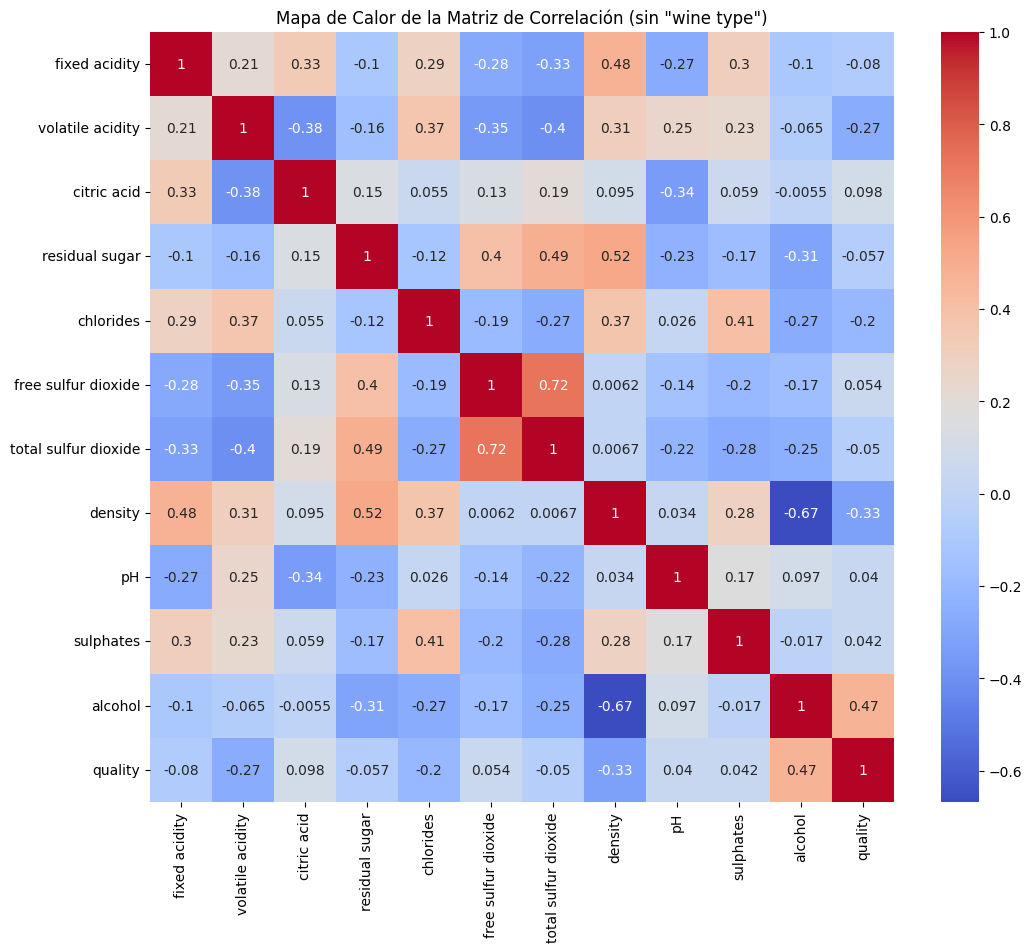

In [20]:
# Excluir 'type' del DataFrame
df_corr = wine_data.drop('type', axis=1)

# Calcular la matriz de correlación
corr_matrix = df_corr.corr()

# Generar el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de la Matriz de Correlación (sin "wine type")')
plt.show()

#### **Estadísticas descriptivas:** 

Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

In [21]:
# Medidas básicas
stats_numeric = wine_data[numeric_cols].describe().T

# Calcula la moda
stats_numeric['moda'] = wine_data[numeric_cols].mode().iloc[0]

# Calcula el rango
stats_numeric['rango'] = wine_data[numeric_cols].max() - wine_data[numeric_cols].min()

# Renombra columnas para claridad
stats_numeric.rename(columns={
    'mean': 'Media',
    '50%': 'Mediana',
    'std': 'Desv. Estándar',
    'min': 'Mínimo',
    'max': 'Máximo'
}, inplace=True)

print(stats_numeric[['Media', 'Mediana', 'moda', 'rango', 'Desv. Estándar']])

# Como opbservamos en los outliers, los valores promedio son representativos en casi todos las caracteristicas menos en Free and Total Sulfur dioxide.

                           Media    Mediana     moda      rango  \
fixed acidity           7.215179    7.00000    6.800   12.10000   
volatile acidity        0.344130    0.30000    0.280    1.50000   
citric acid             0.318494    0.31000    0.300    1.66000   
residual sugar          5.048477    2.70000    1.600   65.20000   
chlorides               0.056690    0.04700    0.036    0.60200   
free sulfur dioxide    30.036654   28.00000    6.000  288.00000   
total sulfur dioxide  114.109023  116.00000  111.000  434.00000   
density                 0.994535    0.99465    0.992    0.05187   
pH                      3.224664    3.21000    3.160    1.29000   
sulphates               0.533357    0.51000    0.500    1.78000   
alcohol                10.549241   10.40000    9.500    6.90000   
quality                 5.795677    6.00000    6.000    6.00000   

                      Desv. Estándar  
fixed acidity               1.319671  
volatile acidity            0.168248  
citric acid

### **Implementación de Modelos:**


### **Modelos de Clasificación:** 

Implementa modelos de Logistic Regression y K-Nearest Neighbors (KNN).

In [22]:
# Identificar variables categóricas
categorical_vars = ['type']

# One-Hot Encoding
data_encoded = pd.get_dummies(wine_data, columns=categorical_vars)


In [23]:
# Separar variables independientes y dependiente
X = data_encoded.drop('quality', axis=1)
y = data_encoded['quality']

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### **Evaluación de Modelos:**

Evalúa los modelos utilizando métricas como accuracy, precision, recall, y F1-score.


In [24]:
# Regresión Logística
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# Métricas Regresión Logística
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')

c:\Users\damav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\damav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Métricas KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

c:\Users\damav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
# Resultados Métricas Regresion Logistica
print("Regresión Logística:")
print(f"Accuracy: {accuracy_logreg:.4f}")
print(f"Precision: {precision_logreg:.4f}")
print(f"Recall: {recall_logreg:.4f}")
print(f"F1-score: {f1_logreg:.4f}")

Regresión Logística:
Accuracy: 0.5442
Precision: 0.5543
Recall: 0.5442
F1-score: 0.5144


In [27]:
# Resultados Métricas KNN
print("\nK-Nearest Neighbors:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-score: {f1_knn:.4f}")


K-Nearest Neighbors:
Accuracy: 0.5273
Precision: 0.5171
Recall: 0.5273
F1-score: 0.5143


Ambos modelos presentan un rendimiento modesto, con una precisión general ligeramente superior al 50%. Esto sugiere que hay margen para mejoras significativas.

La Regresión Logística muestra una ventaja ligera en precisión y recall promedio.
El K-NN tiene un F1-score similar al de la Regresión Logística, lo que indica que, en promedio, ambos modelos tienen un equilibrio comparable entre precisión y recall.

### **Adicional: Optimizacion de modelo**

In [ ]:
# Definir el modelo de Regresión Logística
logreg = LogisticRegression(max_iter=10000, multi_class='multinomial')

# Definir los hiperparámetros a optimizar
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  # 
    'solver': ['lbfgs', 'saga', 'newton-cg'],
    'multi_class': ['multinomial']  
}

In [29]:
# Configurar el Grid Search
grid_search_logreg = GridSearchCV(
    logreg, param_grid_logreg, cv=5, scoring='accuracy', n_jobs=-1
)

# Entrenar el modelo
grid_search_logreg.fit(X_train_scaled, y_train)

# Obtener el mejor modelo
best_logreg = grid_search_logreg.best_estimator_

print("Mejores hiperparámetros para Regresión Logística:")
print(grid_search_logreg.best_params_)


c:\Users\damav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\damav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Mejores hiperparámetros para Regresión Logística:
{'C': 1, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'saga'}


In [30]:
# Predicciones
y_pred_logreg = best_logreg.predict(X_test_scaled)
y_scores_logreg = best_logreg.predict_proba(X_test_scaled)

# Reporte de clasificación
print("Reporte de clasificación para Regresión Logística:")
print(classification_report(y_test, y_pred_logreg))

Reporte de clasificación para Regresión Logística:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       1.00      0.08      0.15        38
           5       0.61      0.60      0.60       348
           6       0.50      0.71      0.59       458
           7       0.57      0.23      0.32       190
           8       0.00      0.00      0.00        25
           9       0.00      0.00      0.00         1

    accuracy                           0.54      1064
   macro avg       0.38      0.23      0.24      1064
weighted avg       0.55      0.54      0.51      1064



c:\Users\damav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\damav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\damav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [31]:
# Reporte de clasificación
print("Reporte de clasificación para Regresión Logística:")
print(classification_report(y_test, y_pred_logreg))

Reporte de clasificación para Regresión Logística:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       1.00      0.08      0.15        38
           5       0.61      0.60      0.60       348
           6       0.50      0.71      0.59       458
           7       0.57      0.23      0.32       190
           8       0.00      0.00      0.00        25
           9       0.00      0.00      0.00         1

    accuracy                           0.54      1064
   macro avg       0.38      0.23      0.24      1064
weighted avg       0.55      0.54      0.51      1064



c:\Users\damav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\damav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\damav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

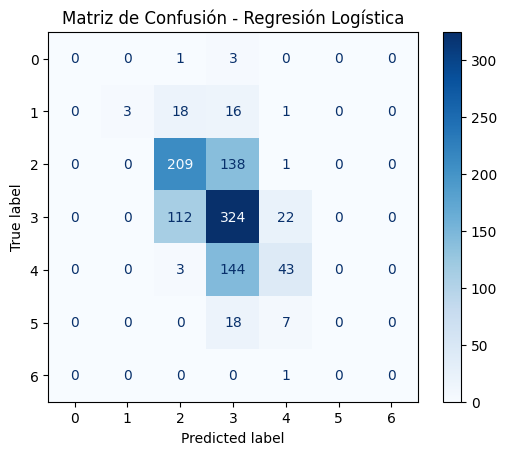

In [32]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg)
disp_logreg.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

In [33]:
# Definir el modelo
knn = KNeighborsClassifier()

# Definir los hiperparámetros a optimizar
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],'weights': ['uniform', 'distance'],'metric': ['euclidean', 'manhattan']
}

# Configurar el Grid Search
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [34]:
# Entrenar el Grid Search para KNeighborsClassifier
grid_search_knn.fit(X_train_scaled, y_train)

# Obtener los mejores hiperparámetros
best_knn = grid_search_knn.best_estimator_
print("Mejores hiperparámetros para K-NN:")
print(grid_search_knn.best_params_)


c:\Users\damav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Mejores hiperparámetros para K-NN:
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


In [35]:
# Predicciones
y_pred_knn = best_knn.predict(X_test_scaled)
y_scores_knn = best_knn.predict_proba(X_test_scaled)[:, 1]

# Reporte de clasificación
print("Reporte de clasificación para K-NN:")
print(classification_report(y_test, y_pred_knn))

Reporte de clasificación para K-NN:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.50      0.16      0.24        38
           5       0.63      0.62      0.62       348
           6       0.54      0.66      0.59       458
           7       0.51      0.38      0.44       190
           8       0.20      0.04      0.07        25
           9       0.00      0.00      0.00         1

    accuracy                           0.56      1064
   macro avg       0.34      0.27      0.28      1064
weighted avg       0.55      0.56      0.55      1064



c:\Users\damav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\damav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\damav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

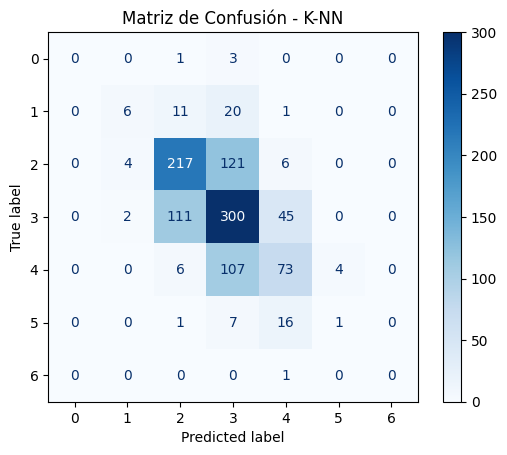

In [36]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - K-NN')
plt.show()

#### **Comparación de Rendimiento:**

 Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

1. Accuracy (Precisión General):
Ambos modelos presentan una precisión general similar, aunque ligeramente superior para K-NN.

2. Macro Average:
La precisión macro promedio es ligeramente superior en la Regresión Logística, pero el recall macro promedio es mejor en K-NN. Sin embargo, ambos valores son bajos, indicando un bajo rendimiento en promedio entre las clases.

3. Weighted Average:
Los promedios ponderados son similares, con una ligera ventaja para K-NN en recall y F1-score.

4. Rendimiento por clase:
Ambos modelos tienen una precisión general (accuracy) similar.
En las clases minoritarias, K-NN parece tener un rendimiento ligeramente mejor que la Regresión Logística, aunque todavía insuficiente.

Aspectos que podrian mejorar las predicciones:
 - Elegir Métricas Adecuadas:
Métricas de Evaluación Sensibles al Desbalance:
Balanced Accuracy: Promedio del recall obtenido en cada clase.
Macro F1-score: No pondera por la cantidad de muestras en cada clase, dando igual importancia a todas las clases.

 - Modelos y Técnicas Alternativas:
XGBoost o LightGBM: Modelos de boosting que pueden manejar desbalance y permiten ajustar pesos de clase.

Mejor modelo en basado en los Resultados Actuales:
Ambos modelos tienen un rendimiento similar.



**Fuentes**

- Coding dojo: material de estudio
- Chat GPT
- Codigo en clase - Notebook en el repositorio de la clase